**Capstone Project Submission**

* Student Name: Wes Swager
* Student Pace: Full Time
* Instructor Name: Claude Fried
* Scheduled Project Review Date/Time
    * Friday, June 11, 2021, 2:30pm CST
    * Tuesday, June 15, 2021, 2:30pm CST
    * Thursday, June 17, 2021, 4:30pm CST

# **Expected Goals Classifier**

# Overview

Create an Expected Goals (xG) classification model using existing historical match data to produce actionable recommendations which can be utilized in technical and tactical analysis to improve goal-scoring.

Project detailed on Github: [milwaukee_rampage_fc](https://github.com/wswager/milwaukee_rampage_fc)

# Data Exploration Notebook

*Notebook 5 of 8*

### Index

1. Data extracted in [expected_goals_data_extraction_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_extraction/expected_goals_data_extraction_notebook.ipynb)
2. Data organized in [expected_goals_data_organization_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_organization/expected_goals_data_organization_notebook.ipynb)
3. Features engineered in [expected_goals_feature_engineering_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/feature_engineering/expected_goals_feature_engineering_notebook.ipynb)
4. Data cleaned in [expected_goals_data_cleaning_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_cleaning/expected_goals_data_cleaning_notebook.ipynb)
5. Data explored in [expected_goals_data_exploration_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_exploration/expected_goals_data_exploration_notebook.ipynb)
6. Data preprocessed in [expected_goals_data_preprocessing_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_preprocessing/expected_goals_data_preprocessing_notebook.ipynb)
7. Modeling in [expected_goals_modeling_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_modeling/expected_goals_modeling_notebook.ipynb)
8. Conclusions in [expected_goals_conclusions_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/conclusions/expected_conclusions_notebook.ipynb)

### Data

Data sourced from [StatsBomb](https://statsbomb.com/), a United Kingdom based football (soccer) data analytics company.

StatsBomb have provided free access to their proprietary dataset via GitHub: [StatsBomb Open Data](https://github.com/statsbomb/open-data)

In [5]:
# Import cleaned_data from expected_goals_data_cleaning_notebook

cleaned_data = pd.read_csv('/content/drive/MyDrive/flatiron/expected_goals/data_cleaning/dataframes/cleaned_data.csv')

In [6]:
cleaned_data = cleaned_data.iloc[: , 1:]

In [7]:
cleaned_data.head()

,statsbomb_xg,goal,time,player,team,shot_distance,inside_18,shot_angle,bodypart,bodypart_angle,technique,first_touch,assist,state_of_play
0,0.266154,False,4,Francesca Kirby,Chelsea FCW,12.529964,True,118.61,Left Foot,Right - Inside Foot,Ground,False,Ground Pass,Open Play
1,0.093521,False,11,Bethany England,Chelsea FCW,8.602325,True,54.46,Head,Left - Head,Ground,False,High Pass,Set Piece - Free Kick
2,0.036171,False,18,Drew Spence,Chelsea FCW,26.172505,False,96.58,Left Foot,Right - Inside Foot,Ground,False,Ground Pass,Open Play
3,0.016625,False,23,Chloe Arthur,Birmingham City WFC,34.525353,False,79.99,Left Foot,Left - Outside Foot,Ground,False,Ground Pass,Set Piece - Goal Kick
4,0.030716,False,23,Bethany England,Chelsea FCW,26.925824,False,74.93,Right Foot,Left - Inside Foot,Ground,False,Ground Pass,Set Piece - Goal Kick


<a id = 'packages'></a>
# Packages

In [1]:
# Drive  and IO to access saved data
from google.colab import drive, files
drive.mount('/content/drive')

import io

# Pandas for Dataframes
import pandas as pd
from IPython.display import display

# Numpy for mathematical functions
import numpy as np

# Datetime for converting datetimes
import datetime

# Matplotlib and Seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import seaborn as sns
sns.set(style = 'darkgrid', context = 'talk')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


# Functions

In [8]:
# Visualize distribution of continuous variable feature shots and goals

def int_feature_v_goal(feature,
                       xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.legend(labels = ['Goal',
                        'Miss'],
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0);

In [9]:
# Visualize distribution of categorical variable feature shots and goals

def category_feature_v_goal(feature,
                            xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.legend(labels = ['Goal',
                        'Miss'],
              bbox_to_anchor = (1.05, 1),
              loc = 2,
              borderaxespad = 0);

In [10]:
# Visualize distribution of boolean variable feature shots and goals

def boolean_feature_v_goal(feature,
                            xlabel):
    f, ax = plt.subplots(figsize=(10, 10))
    sns.set_palette(sns.color_palette(['plum', 'purple']))
    sns.histplot(data = cleaned_data,
                 ax = ax,
                 multiple = 'stack',
                 x = feature,
                 hue = 'goal',
                 element = 'bars')
    ax.set_title('Goals v Shots by ' + xlabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])
    ax.legend(labels = ['Goal', 'Miss'],
             bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0);

# Goals by Shot

In [11]:
print('Ratio of Goals:',
      round(((len(cleaned_data[cleaned_data['goal'] == True]) /
      len(cleaned_data)) * 100), 2), '%')

Ratio of Goals: 10.91 %


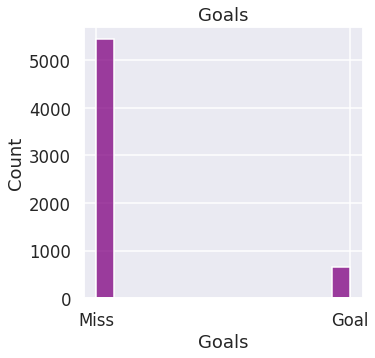

In [12]:
# Visualize ratio of goals

f, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data = cleaned_data,
             ax = ax,
             stat = 'count',
             multiple = 'stack',
             x = 'goal',
             kde = False,
             color = 'purple',
             element = 'bars',
             legend = False)
ax.set_title('Goals')
ax.set_xlabel('Goals')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Miss', 'Goal']);

The ratio of goals from total shots will serve as a baseline goal ratio for comparison with other features.

# Features

## Time

In [13]:
print('Earliest Goal', cleaned_data['time'].min(), 'minutes')
print('Latest Goal', cleaned_data['time'].max(), 'minutes')

Earliest Goal 0 minutes
Latest Goal 54 minutes


In [16]:
# Assess ratio of shots and goals within specified intervals

# Create a dataframe of time intervals

time_intervals_list = ['< 5', '5-15', '15-25',
                       '25-35', '35-45', '> 45']

time_intervals_df = pd.DataFrame(time_intervals_list)

# Calculate ratios each interval represents of total

time_ratios_list = []
time_ratios_list.append((round((((5 - 0) / 45) * 100), 2)))
time_ratios_list.append((round((((15 - 5) / 45) * 100), 2)))
time_ratios_list.append((round((((25 - 15) / 45) * 100), 2)))
time_ratios_list.append((round((((35 - 25) / 45) * 100), 2)))
time_ratios_list.append((round((((45 - 35) / 45) * 100), 2)))
time_ratios_list.append((round((((55 - 45) / 45) * 100), 2)))

time_ratios_df = pd.DataFrame(time_ratios_list)

# Concatenate time_intervals_df and time_ratios_df

time_interval_ratios = pd.concat([time_intervals_df,
                                  time_ratios_df],
                                  axis = 1)
time_interval_ratios.columns = ['Time Interval', 'Ratio Time']

# Calculate ratio of shots within defined time intervals

shot_time_ratios = []
shot_time_ratios.append(round(((len(cleaned_data[(cleaned_data['time'] <
                                             5)])) /
                          (len(cleaned_data)) * 
                          100), 2))
shot_time_ratios.append(round(((len(cleaned_data[(cleaned_data['time'] >
                                             5) &
                                            (cleaned_data['time'] <
                                             15)])) /
                          (len(cleaned_data)) * 100), 2))
shot_time_ratios.append(round(((len(cleaned_data[(cleaned_data['time'] >
                                             15) &
                                            (cleaned_data['time'] <
                                             25)])) /
                          (len(cleaned_data)) *
                          100), 2))
shot_time_ratios.append(round(((len(cleaned_data[(cleaned_data['time'] >
                                             25) &
                                            (cleaned_data['time'] <
                                             35)])) /
                          (len(cleaned_data)) *
                          100), 2))
shot_time_ratios.append(round(((len(cleaned_data[(cleaned_data['time'] >
                                             35) &
                                            (cleaned_data['time'] <
                                             45)])) /
                          (len(cleaned_data)) *
                          100), 2))
shot_time_ratios.append(round(((len(cleaned_data[(cleaned_data['time'] >
                                             45)])) /
                          (len(cleaned_data)) *
                          100), 2))

# Add shot_time_ratios to time_interval_ratios

time_interval_ratios['Ratio Total Shots'] = shot_time_ratios

# Calculate ratio of goals within defined time intervals

goal_time_ratios = []
goal_time_ratios.append(round(((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                 (cleaned_data['time'] <
                                                  5)]) /
                                len(cleaned_data[cleaned_data['goal'] == True])) *
                               100), 2))
goal_time_ratios.append(round(((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                 (cleaned_data['time'] >
                                                  5) &
                                                 (cleaned_data['time'] <
                                                  15)]) /
                                len(cleaned_data[cleaned_data['goal'] == True])) *
                               100), 2))
goal_time_ratios.append(round(((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                 (cleaned_data['time'] >
                                                  15) &
                                                 (cleaned_data['time'] <
                                                  25)]) /
                                len(cleaned_data[cleaned_data['goal'] == True])) *
                               100), 2))
goal_time_ratios.append(round(((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                 (cleaned_data['time'] >
                                                  25) &
                                                 (cleaned_data['time'] <
                                                  35)]) /
                                len(cleaned_data[cleaned_data['goal'] == True])) *
                               100), 2))
goal_time_ratios.append(round(((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                 (cleaned_data['time'] >
                                                  35) &
                                                 (cleaned_data['time'] <
                                                  45)]) /
                                len(cleaned_data[cleaned_data['goal'] == True])) *
                               100), 2))
goal_time_ratios.append(round(((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                 (cleaned_data['time'] >
                                                  45)]) /
                                len(cleaned_data[cleaned_data['goal'] == True])) *
                               100), 2))

# Add goal_time_ratios to time_interval_ratios

time_interval_ratios['Ratio Total Goals'] = goal_time_ratios

# Calculate the ratio of shots within the interval which resulted in a goal

goal_shot_time_ratios = []
goal_shot_time_ratios.append(round((((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                                        (cleaned_data['time'] < 5)]))/
                                     (len(cleaned_data[(cleaned_data['time'] < 5)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                                        (cleaned_data['time'] > 5) &
                                                                        (cleaned_data['time'] < 15)]))/
                                     (len(cleaned_data[(cleaned_data['time'] > 5) &
                                                                        (cleaned_data['time'] < 15)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                                        (cleaned_data['time'] > 15) &
                                                                        (cleaned_data['time'] < 25)]))/
                                     (len(cleaned_data[(cleaned_data['time'] > 15) &
                                                                        (cleaned_data['time'] < 25)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                                        (cleaned_data['time'] > 25) &
                                                                        (cleaned_data['time'] < 35)]))/
                                     (len(cleaned_data[(cleaned_data['time'] > 25) &
                                                                        (cleaned_data['time'] < 35)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                                        (cleaned_data['time'] > 35) &
                                                                        (cleaned_data['time'] < 45)]))/
                                     (len(cleaned_data[(cleaned_data['time'] > 35) &
                                                                        (cleaned_data['time'] < 45)]))) *
                                    100), 2))
goal_shot_time_ratios.append(round((((len(cleaned_data[(cleaned_data['goal'] == True) &
                                                                        (cleaned_data['time'] > 45)]))/
                                     (len(cleaned_data[(cleaned_data['time'] > 45)]))) *
                                    100), 2))
# Add goal_shot_time_ratios to time_interval_ratios

time_interval_ratios['Ratio Goals per Capita'] = goal_shot_time_ratios

time_interval_ratios = time_interval_ratios[['Time Interval',
                                             'Ratio Time',
                                             'Ratio Total Shots',
                                             'Ratio Total Goals',
                                             'Ratio Goals per Capita']]
# Display results

time_interval_ratios

,Time Interval,Ratio Time,Ratio Total Shots,Ratio Total Goals,Ratio Goals per Capita
0,< 5,11.11,10.01,9.46,10.31
1,5-15,22.22,18.92,21.17,12.21
2,15-25,22.22,18.81,19.22,11.15
3,25-35,22.22,18.58,19.52,11.46
4,35-45,22.22,18.32,18.32,10.91
5,> 45,22.22,5.36,3.75,7.65


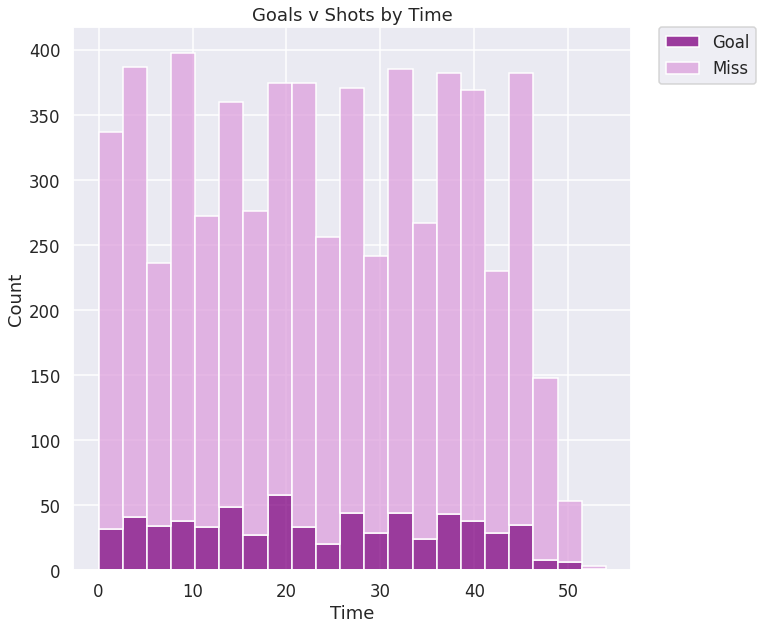

In [17]:
int_feature_v_goal('time',
                   'Time')

### Assessment

There does not appear to be a significant correlation between the time and the distribution of either shots or goals, nor does there appear to be a correlation between the time of the shot and the likelihood of a goal.

(*Note - After 45-minutes would indicate shots during stoppage-time, which varies per match and is likely, on average, less than 10-minutes*)

## Shot Distance

In [18]:
cleaned_data['shot_distance'].describe()

count    6104.000000
mean       18.916359
std         9.071373
min         1.000000
25%        11.526057
50%        17.804494
75%        25.546526
max        66.540213
Name: shot_distance, dtype: float64

In [21]:
# Create a dataframe of shot distance intervals

shot_distance_intervals = ['<10', '10-20', '20-30', '30-40',
                           '40-50', '50-60', '>60']
distance_ratios = pd.DataFrame(shot_distance_intervals)

# Calculate ratio of shots and goals in 10-yard intervals from goal_center

shot_distance_ratios = []
goal_distance_ratios = []
goal_shot_distance_ratios = []
for i in range(0, 70, 10):
  shot_distance_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10))]) /
                                      len(cleaned_data)) *
                                     100), 2))

  goal_distance_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10)) &
                                                       (cleaned_data['goal'] == True)]) /
                                      len(cleaned_data[cleaned_data['goal'] == True])) *
                                     100), 2))
  
  goal_shot_distance_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10)) &
                                                       (cleaned_data['goal'] == True)]) /
                                      len(cleaned_data[(cleaned_data['shot_distance'] > i) &
                                                       (cleaned_data['shot_distance'] < (i + 10))])) *
                                     100), 2))

distance_ratios['Ratio of Total Shots'] = shot_distance_ratios
distance_ratios['Ratio of Total Goals'] = goal_distance_ratios
distance_ratios['Ratio of Goals per Capita'] = goal_shot_distance_ratios

distance_ratios.rename(columns = {distance_ratios.columns[0] : 'Distance' },
                            inplace = True)

distance_ratios

,Distance,Ratio of Total Shots,Ratio of Total Goals,Ratio of Goals per Capita
0,<10,18.59,39.19,23.00
1,10-20,37.99,45.50,13.07
2,20-30,30.24,11.26,4.06
3,30-40,11.11,3.30,3.24
4,40-50,1.02,0.45,4.84
5,50-60,0.13,0.00,0.00
6,>60,0.07,0.15,25.00


In [22]:
print('Ratio of Shots Within 30-Yards:',
      (round((len(cleaned_data[(cleaned_data['shot_distance'] < 30)]) /
              (len(cleaned_data)) * 100), 2)), '%')
print('Ratio of Goals Within 20-Yards:',
      (round((len(cleaned_data[(cleaned_data['shot_distance'] < 20) &
                               cleaned_data['goal'] == True]) /
              (len(cleaned_data[cleaned_data['goal'] == True])) * 100), 2)), '%')

Ratio of Shots Within 30-Yards: 87.52 %
Ratio of Goals Within 20-Yards: 84.83 %


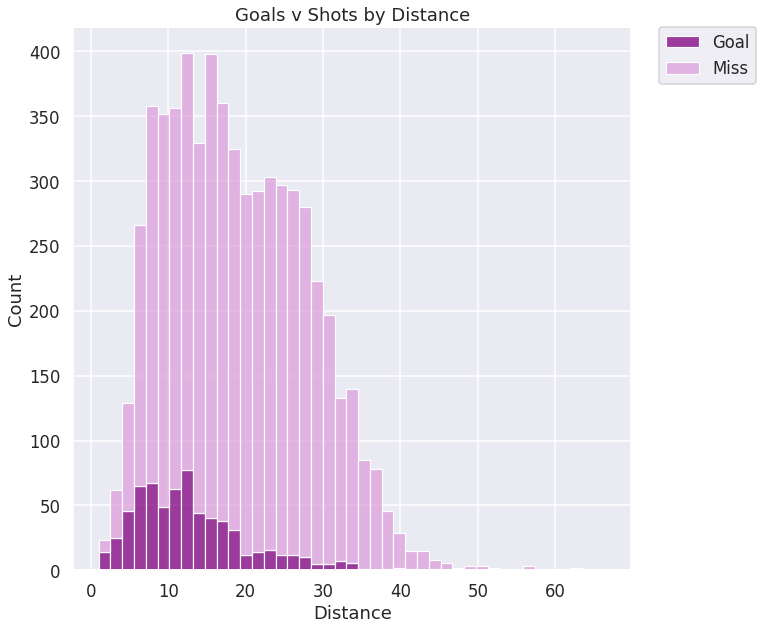

In [23]:
int_feature_v_goal('shot_distance',
                   'Distance')

### Assessment

The distribution of shots skews toward the 10-30-yard range, however, the distribution of goals skews closer, the 0-20-yard range.

Similarly, the ratio of goals per capita within the 0-20-yard is higher and significantly higher than the baseline goal ratio.

This indicated a correlation between shots closer to goal and an increased likelihood of scoring.

This could also indicate that players are often shooting too far from goal.

(*Note - the higher ratio of goals per capita from greater-than 60-yards is likely an outlier.  Very few shots have been taken from this distance, but the shots taken were likely in scenarios when scoring was relatively assured, for example if the keeper was not positioned within the goal*)

## Inside 18-Yard Box

In [26]:
# Create a dataframe for shots inside the 18-yard-box

inside_18_list = cleaned_data['inside_18'].unique()
inside_18_ratio = pd.DataFrame(inside_18_list)

# Calculate ratio of shots and goals inside the 18-yard box

inside_18_shot_ratio = []
inside_18_goal_ratio = []
inside_18_goal_shot_ratio = []
for i in inside_18_list:
  inside_18_shot_ratio.append(round((((len(cleaned_data[cleaned_data['inside_18'] ==
                                                  i])) /
                                (len(cleaned_data))) *
                               100), 2))
  
  inside_18_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['inside_18'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['goal'] == True]))) *
                               100), 2))

  inside_18_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['inside_18'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['inside_18'] == i]))) *
                               100), 2))

inside_18_ratio['Ratio of Total Shots'] = inside_18_shot_ratio
inside_18_ratio['Ratio of Total Goals'] = inside_18_goal_ratio
inside_18_ratio['Ratio of Goals per Capita'] = inside_18_goal_shot_ratio
inside_18_ratio.rename(columns = {inside_18_ratio.columns[0] : 'Inside 18-Yard Box' },
                            inplace = True)

inside_18_ratio

,Inside 18-Yard Box,Ratio of Total Shots,Ratio of Total Goals,Ratio of Goals per Capita
0,True,58.78,84.23,15.64
1,False,41.22,15.77,4.17


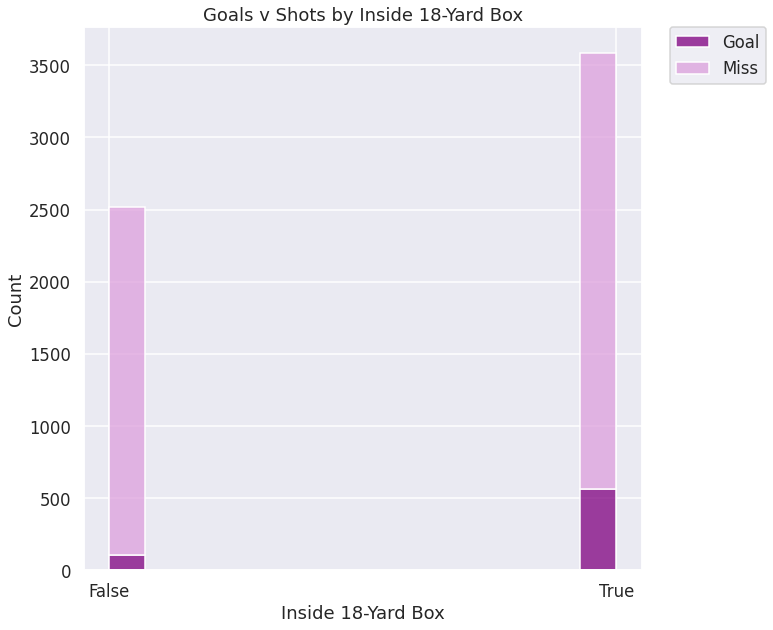

In [25]:
boolean_feature_v_goal('inside_18',
                       'Inside 18-Yard Box')

### Assessment

The ratio of the total goals from inside the 18-yard box is significantly higher than the ratio of shots from inside the 18-yard box.

Similarly, the ratio of goals per capita inside the 18-yard box is significantly higher than the baseline goal ratio.

This indicates that shots from inside the box have a significant correlation with the likelihood of scoring.

## Shot Angle

In [27]:
cleaned_data['shot_angle'].describe()

count    6104.000000
mean       91.022638
std        33.911162
min         0.000000
25%        64.650000
50%        90.460000
75%       116.995000
max       180.000000
Name: shot_angle, dtype: float64

In [29]:
# Create a dataframe of shot angle intervals

shot_angle_intervals = ['<10', '10-20', '20-30', '30-40', '40-50',
                        '50-60', '60-70', '70-80', '>80']

shot_angle_ratios = pd.DataFrame(shot_angle_intervals)

shot_angle_ratios.rename(columns = {shot_angle_ratios.columns[0] : 'Angle from Center' },
                         inplace = True)

# Calculate ratio of total shots in 10-degree intervals from center

left_angle_shot_ratios = []
for i in range(90, 180, 10):
  left_angle_shot_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) /
                                   len(cleaned_data)) *
                                  100), 2))

shot_angle_ratios['Left - Ratio Total Shots'] = left_angle_shot_ratios

right_angle_ratios = []
for i in range(0, 90, 10):
  right_angle_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) /
                                   len(cleaned_data)) *
                                  100), 2))

shot_angle_ratios['Right - Ratio Total Shots'] = right_angle_ratios
shot_angle_ratios['Right - Ratio Total Shots'] = shot_angle_ratios['Right - Ratio Total Shots'].values[::-1]

# Calculate ratio of total goals in 10-degree intervals from center

left_angle_goal_ratios = []
for i in range(90, 180, 10):
  left_angle_goal_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[cleaned_data['goal'] == True])) *
                                  100), 2))

shot_angle_ratios['Left - Ratio Total Goals'] = left_angle_goal_ratios

right_angle_goal_ratios = []
for i in range(0, 90, 10):
  right_angle_goal_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[cleaned_data['goal'] == True])) *
                                  100), 2))

shot_angle_ratios['Right - Ratio Total Goals'] = right_angle_goal_ratios
shot_angle_ratios['Right - Ratio Total Goals'] = shot_angle_ratios['Right - Ratio Total Goals'].values[::-1]

# Calculate ratio of goals from shots within 10-degree intervals from center

left_angle_goal_shot_ratios = []
for i in range(90, 180, 10):
  left_angle_goal_shot_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) *
                                             100)), 2))

shot_angle_ratios['Left - Ratio Goals per Capita'] = left_angle_goal_shot_ratios

right_angle_goal_shot_ratios = []
for i in range(0, 90, 10):
  right_angle_goal_shot_ratios.append(round(((len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10)) &
                                                      (cleaned_data['goal'] == True)]) /
                                   len(cleaned_data[(cleaned_data['shot_angle'] > i) &
                                                      (cleaned_data['shot_angle'] < (i + 10))]) *
                                              100)), 2))

shot_angle_ratios['Right - Ratio Goals per Capita'] = right_angle_goal_shot_ratios
shot_angle_ratios['Right - Ratio Goals per Capita'] = shot_angle_ratios['Right - Ratio Goals per Capita'].values[::-1]

shot_angle_ratios

,Angle from Center,Left - Ratio Total Shots,Right - Ratio Total Shots,Left - Ratio Total Goals,Right - Ratio Total Goals,Left - Ratio Goals per Capita,Right - Ratio Goals per Capita
0,<10,8.47,8.03,10.66,6.31,13.73,8.57
1,10-20,9.53,8.99,10.21,8.11,11.68,9.84
2,20-30,9.81,8.90,9.61,7.06,10.68,8.66
3,30-40,8.49,7.73,8.26,7.51,10.62,10.59
4,40-50,6.54,6.36,6.16,4.65,10.28,7.99
5,50-60,4.10,3.70,4.65,4.05,12.40,11.95
6,60-70,2.15,1.75,3.30,1.50,16.79,9.35
7,70-80,0.84,0.85,1.20,1.05,15.69,13.46
8,>80,0.20,0.31,0.30,0.30,16.67,10.53


In [31]:
# Create a dataframe for shot side

side_list = ['Right',
             'Left']

side_ratio = pd.DataFrame(side_list)

side_ratio.rename(columns = {side_ratio.columns[0] : 'Side' },
                            inplace = True)

# Calculate ratio of shots and goals side

side_shot_ratio = [(round((len(cleaned_data[cleaned_data['shot_angle'] < 90]) /
                           len(cleaned_data)) * 100, 2)),
                   (round((len(cleaned_data[cleaned_data['shot_angle'] > 90]) /
                           len(cleaned_data)) * 100, 2))]

side_goal_ratio = [(round((len(cleaned_data[(cleaned_data['shot_angle'] < 90) &
                                            cleaned_data['goal'] == True]) /
                           len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2)),
                   (round((len(cleaned_data[(cleaned_data['shot_angle'] > 90) &
                                            cleaned_data['goal'] == True]) /
                           len(cleaned_data[cleaned_data['goal'] == True])) * 100, 2))]

side_shot_goal_ratio = [(round(((len(cleaned_data[(cleaned_data['shot_angle'] < 90) &
                                                 (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[(cleaned_data['shot_angle'] < 90)]))) * 100, 2)),
                        (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 90) &
                                                 (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[(cleaned_data['shot_angle'] > 90)]))) * 100, 2))]

side_ratio['Ratio Total Shots'] = side_shot_ratio
side_ratio['Ratio Total Goals'] = side_goal_ratio
side_ratio['Ratio Goals per Capita'] = side_shot_goal_ratio

side_ratio

,Side,Ratio Total Shots,Ratio Total Goals,Ratio Goals per Capita
0,Right,46.66,40.54,9.48
1,Left,50.15,54.35,11.83


In [32]:
print('Ratio of Total Shots within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135)]) /
                   len(cleaned_data)) *
               100), 2)), '%')

print('Ratio of Total Goals within 45-Degrees from Center:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135) &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[cleaned_data['goal'] == True])) *
               100), 2)), '%')

print('Ratio of Goals per Capita:',
      (round(((len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135) &
                                (cleaned_data['goal'] == True)]) /
                   len(cleaned_data[(cleaned_data['shot_angle'] > 45) &
                                  (cleaned_data['shot_angle'] < 135)])) *
               100), 2)), '%')

Ratio of Total Shots within 45-Degrees from Center: 79.23 %
Ratio of Total Goals within 45-Degrees from Center: 78.08 %
Ratio of Goals per Capita: 10.75 %


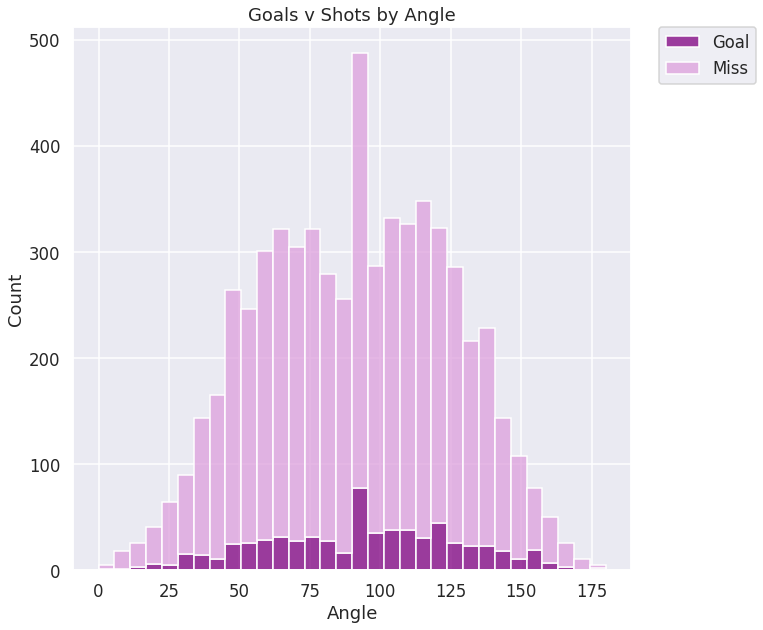

In [ ]:
int_feature_v_goal('shot_angle',
                   'Angle')

### Assessment

The majority of shots are taken from within a 45-degree angle.

The distribution of total goals does not differ significantly from the distribution of shots.

However, the ratio of goals from shots left of center is significantly higher (*this holds true at all intervals*)

As a hypothesis, this is likely due to most players being right-footed:
* Shooting with the inside-foot improves the body-position and flight-angle for the shot
* Crosses will be more accurate, and, likely for that reason, more frequent, with the outside-foot and crosses are typically aimed to travel across the face of goal and are then finished on the opposite side

## Bodypart

In [ ]:
# Display value counts for bodypart

display(cleaned_data['bodypart'].value_counts(dropna = False))

Right Foot        3493
Left Foot         1676
Head               926
Other Bodypart       9
Name: bodypart, dtype: int64

In [33]:
# Create a dataframe of shot angle intervals

bodypart_list = ['Right Foot',
                  'Left Foot',
                  'Head']

bodypart_ratio = pd.DataFrame(bodypart_list)

bodypart_ratio.rename(columns = {bodypart_ratio.columns[0] : 'Bodypart' },
                            inplace = True)

# Calculate ratio of shots and goals by bodypart

bodypart_shot_ratio = []
bodypart_goal_ratio = []
bodypart_goal_shot_ratio = []
for i in bodypart_list:
  bodypart_shot_ratio.append(round((((len(cleaned_data[cleaned_data['bodypart'] ==
                                                  i])) /
                                (len(cleaned_data))) *
                               100), 2))
  
  bodypart_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['bodypart'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['goal'] == True]))) *
                               100), 2))
  
  bodypart_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['bodypart'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['bodypart'] ==
                                                  i]))) *
                               100), 2))

bodypart_ratio['Ratio of Total Shots'] = bodypart_shot_ratio
bodypart_ratio['Ratio of Total Goals'] = bodypart_goal_ratio
bodypart_ratio['Ratio of Goals per Capita'] = bodypart_goal_shot_ratio

bodypart_ratio

,Bodypart,Ratio of Total Shots,Ratio of Total Goals,Ratio of Goals per Capita
0,Right Foot,57.22,57.96,11.05
1,Left Foot,27.46,24.77,9.84
2,Head,15.17,16.82,12.10


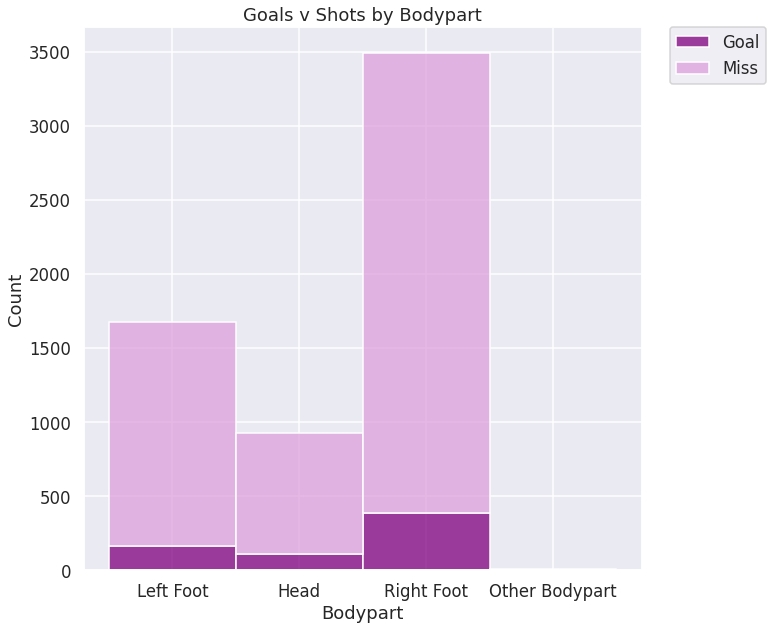

In [ ]:
category_feature_v_goal('bodypart',
                        'Bodypart')

### Assessment

As expected, the majority of shots are with the right-foot.

The distribution of goals per bodypart does not differ significantly from the ratio of shots.

The ratio of goals per capita does not differ significantly from the baseline goal ratio.

## Technique

In [ ]:
# Display value counts for technique

cleaned_data['technique'].value_counts(dropna = False)

Normal Shot    5229
Half Volley     509
Volley          366
Name: technique, dtype: int64

In [34]:
# Create a dataframe of shot angle intervals

technique_list = cleaned_data['technique'].unique()

technique_ratio = pd.DataFrame(technique_list)

technique_ratio.rename(columns = {technique_ratio.columns[0] : 'Technique' },
                            inplace = True)

# Calculate ratio of shots and goals by technique

technique_shot_ratio = []
technique_goal_ratio = []
technique_goal_shot_ratio = []
for i in technique_list:
  technique_shot_ratio.append(round((((len(cleaned_data[cleaned_data['technique'] ==
                                                  i])) /
                                (len(cleaned_data))) *
                               100), 2))
  
  technique_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['technique'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['goal'] == True]))) *
                               100), 2))
  
  technique_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['technique'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['technique'] == i]))) *
                               100), 2))

technique_ratio['Ratio Total Shots'] = technique_shot_ratio
technique_ratio['Ratio Total Goals'] = technique_goal_ratio
technique_ratio['Ratio Goal per Capita'] = technique_goal_shot_ratio

technique_ratio

,Technique,Ratio Total Shots,Ratio Total Goals,Ratio Goal per Capita
0,Ground,85.67,84.68,10.79
1,Volley,14.33,15.32,11.66


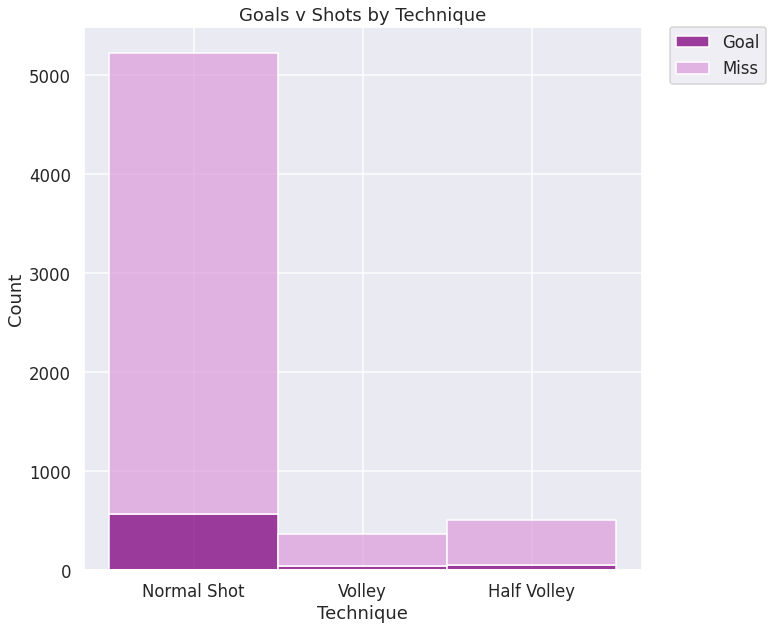

In [ ]:
category_feature_v_goal('technique',
                        'Technique')

### Assessment

As expected, the majority of shots are from the ground.

The ratio of goals per technique does not differ significantly from the ratio of shots.

The ratio of goals per capita does not differ significantly from the baseline goal ratio.


## First Touch

In [35]:
# Create a dataframe of shot angle intervals

first_touch_list = cleaned_data['first_touch'].unique()

first_touch_ratio = pd.DataFrame(first_touch_list)

first_touch_ratio.rename(columns = {first_touch_ratio.columns[0] : 'First Touch' },
                            inplace = True)

# Calculate ratio of shots and goals by first touch

first_touch_shot_ratio = []
first_touch_goal_ratio = []
first_touch_goal_shot_ratio = []
for i in first_touch_list:
  first_touch_shot_ratio.append(round((((len(cleaned_data[cleaned_data['first_touch'] ==
                                                  i])) /
                                (len(cleaned_data))) *
                               100), 2))
  
  first_touch_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['first_touch'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['goal'] == True]))) *
                               100), 2))
  
  first_touch_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['first_touch'] ==
                                                  i) &
                                                  (cleaned_data['goal'] == True)])) /
                                (len(cleaned_data[cleaned_data['first_touch'] == i]))) *
                               100), 2))

first_touch_ratio['Ratio Total Shots'] = first_touch_shot_ratio
first_touch_ratio['Ratio Total Goal'] = first_touch_goal_ratio
first_touch_ratio['Ratio Goals per Capita'] = first_touch_goal_shot_ratio

first_touch_ratio

,First Touch,Ratio Total Shots,Ratio Total Goal,Ratio Goals per Capita
0,False,78.77,73.42,10.17
1,True,21.23,26.58,13.66


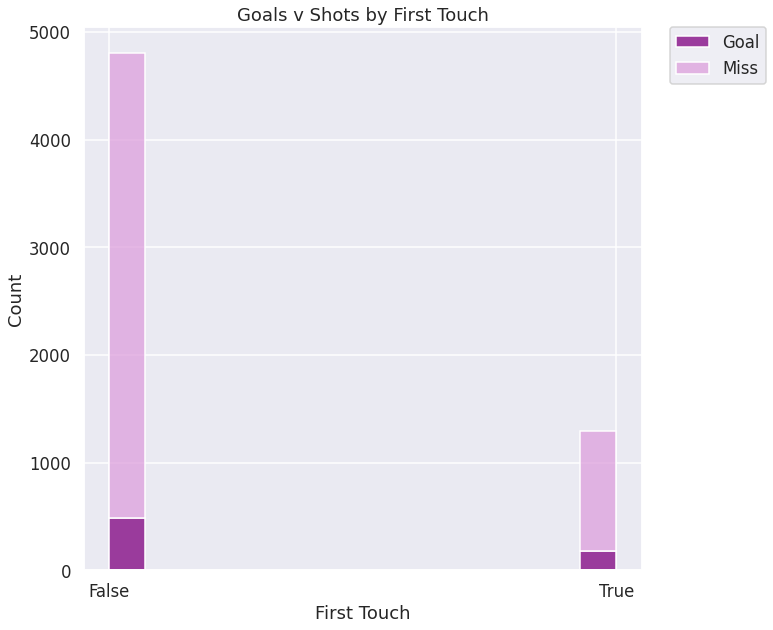

In [ ]:
boolean_feature_v_goal('first_touch',
                        'First Touch')

### Assessment

As expected, the majority of shots are not with the first-touch.

A slightly higher ratio of shots with the first-touch result in a goal.

## Assist

In [36]:
# Create a dataframe of shot angle intervals

assist_list = cleaned_data['assist'].unique()
assist_ratio = pd.DataFrame(assist_list)
assist_ratio.rename(columns = {assist_ratio.columns[0] : 'Assist' },
                    inplace = True)

# Calculate ratio of shots and goals by assist type

assist_shot_ratio = []
assist_goal_ratio = []
assist_goal_shot_ratio = []
for i in assist_list:
  assist_shot_ratio.append(round((((len(cleaned_data[cleaned_data['assist'] ==
                                                     i])) /
                                   (len(cleaned_data))) *
                                  100), 2))

  assist_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['assist'] ==
                                                      i) &
                                                     (cleaned_data['goal'] == True)])) /
                                   (len(cleaned_data[cleaned_data['goal'] == True]))) *
                                  100), 2))
  
  assist_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['assist'] ==
                                                      i) &
                                                     (cleaned_data['goal'] == True)])) /
                                   (len(cleaned_data[cleaned_data['assist'] == i]))) *
                                  100), 2))

assist_ratio['Ratio Total Shots'] = assist_shot_ratio
assist_ratio['Ratio Total Goals'] = assist_goal_ratio
assist_ratio['Ratio Goals per Capita'] = assist_goal_shot_ratio

assist_ratio

,Assist,Ratio Total Shots,Ratio Total Goals,Ratio Goals per Capita
0,Ground Pass,29.28,19.82,7.39
1,High Pass,13.60,11.71,9.40
2,Through Ball,3.23,8.71,29.44
3,Unassisted,32.00,31.23,10.65
4,Low Pass,6.16,6.01,10.64
5,Cross,15.74,22.52,15.61


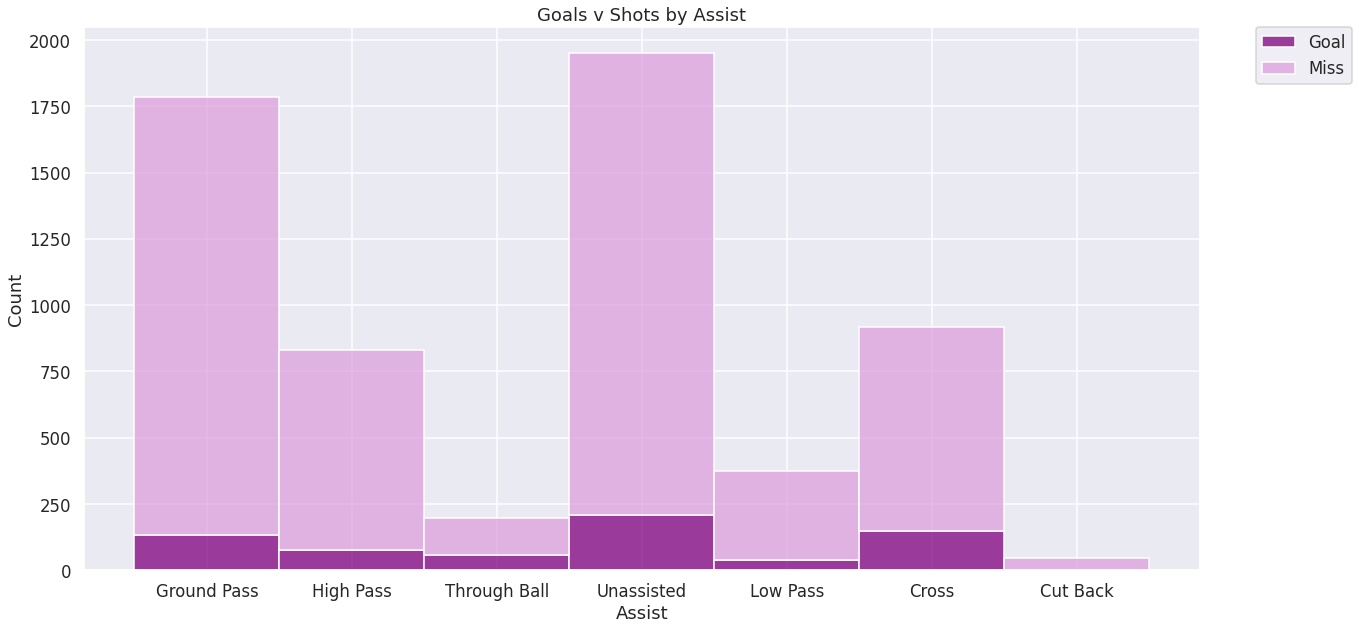

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set_palette(sns.color_palette(['plum', 'purple']))
sns.histplot(data = cleaned_data,
             ax = ax,
             multiple = 'stack',
             x = 'assist',
             hue = 'goal',
             element = 'bars')
ax.set_title('Goals v Shots by Assist')
ax.set_xlabel('Assist')
ax.legend(labels = ['Goal',
                    'Miss'],
          bbox_to_anchor = (1.05, 1),
          loc = 2,
          borderaxespad = 0);

### Assessment

Unassisted accounts for the largest ratio of shots and a similar ratio of goals, but the ratio of goals per capita does not differ significantly from the baseline.

Ground Passes account for a significant ratio of shots, however, has a signigicantly lower ratio of goals per capita, significantly lower than the baseline goal ratio.

Crosses account for a higher ratio of shots and also a higher  ratio of goals per capita, higher than the baseline goal ratio.  This indicates a correlation between crosses and the likelihood of scoring.

Through-balls account for a lower ratio of shots, however, has the highest ratio of goals per capita, significantly higher than the baseline goal ratio.

## State of Play

In [37]:
# Create a dataframe of shot angle intervals

state_of_play_list = cleaned_data['state_of_play'].unique()
state_of_play_ratio = pd.DataFrame(state_of_play_list)
state_of_play_ratio.rename(columns = {state_of_play_ratio.columns[0] : 'State of Play' },
                    inplace = True)

# Calculate ratio of shots and goals by state of play

state_of_play_shot_ratio = []
state_of_play_goal_ratio = []
state_of_play_goal_shot_ratio = []
for i in state_of_play_list:
  state_of_play_shot_ratio.append(round((((len(cleaned_data[cleaned_data['state_of_play'] ==
                                                     i])) /
                                   (len(cleaned_data))) *
                                  100), 2))
  
  state_of_play_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['state_of_play'] ==
                                                      i) &
                                                     (cleaned_data['goal'] == True)])) /
                                   (len(cleaned_data[cleaned_data['goal'] == True]))) *
                                  100), 2))
  
  state_of_play_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['state_of_play'] ==
                                                      i) &
                                                     (cleaned_data['goal'] == True)])) /
                                   (len(cleaned_data[cleaned_data['state_of_play'] == i]))) *
                                  100), 2))

state_of_play_ratio['Ratio Total Shots'] = state_of_play_shot_ratio
state_of_play_ratio['Ratio Total Goals'] = state_of_play_goal_ratio
state_of_play_ratio['Ratio Goals per Capita'] = state_of_play_goal_shot_ratio

state_of_play_ratio

,State of Play,Ratio Total Shots,Ratio Total Goals,Ratio Goals per Capita
0,Open Play,28.00,30.33,11.82
1,Set Piece - Free Kick,8.01,8.56,11.66
2,Set Piece - Goal Kick,2.39,3.75,17.12
3,Set Piece - Corner,10.93,9.76,9.75
4,Open Play - Unassisted,27.97,23.12,9.02
5,Set Piece - Throw In,13.83,10.36,8.18
6,Set Piece - Penalty,0.87,5.71,71.70
7,Open Play - Counter Attack,4.85,6.01,13.51
8,Set Piece - Direct Free Kick,3.16,2.40,8.29


In [38]:
# Create a dataframe for Open Play v Set Piece

ovs_list = ['Open Play',
            'Set Piece']

ovs_ratio = pd.DataFrame(ovs_list)

ovs_ratio.rename(columns = {ovs_ratio.columns[0] : 'State of Play' },
                    inplace = True)

# Calculate ratio of shots and goals for Open Play v Set Piece

ovs_shot_ratio = []
ovs_goal_ratio = []
ovs_goal_shot_ratio = []
for i in ovs_list:
  ovs_shot_ratio.append(round((((len(cleaned_data[cleaned_data['state_of_play'].str.contains(i)])) /
                                (len(cleaned_data))) * 100), 2))
  
  ovs_goal_ratio.append(round((((len(cleaned_data[(cleaned_data['state_of_play'].str.contains(i)) &
                                                            (cleaned_data['goal'] == True)])) /
                                          (len(cleaned_data[cleaned_data['goal'] == True]))) *
                                         100), 2))
  ovs_goal_shot_ratio.append(round((((len(cleaned_data[(cleaned_data['state_of_play'].str.contains(i)) &
                                                            (cleaned_data['goal'] == True)])) /
                                          (len(cleaned_data[cleaned_data['state_of_play'].str.contains(i)]))) *
                                         100), 2))

ovs_ratio['Ratio Total Shots'] = ovs_shot_ratio
ovs_ratio['Ratio Total Goals'] = ovs_goal_ratio
ovs_ratio['Ratio Goals per Capita'] = ovs_goal_shot_ratio

ovs_ratio

,State of Play,Ratio Total Shots,Ratio Total Goals,Ratio Goals per Capita
0,Open Play,60.81,59.46,10.67
1,Set Piece,39.19,40.54,11.29


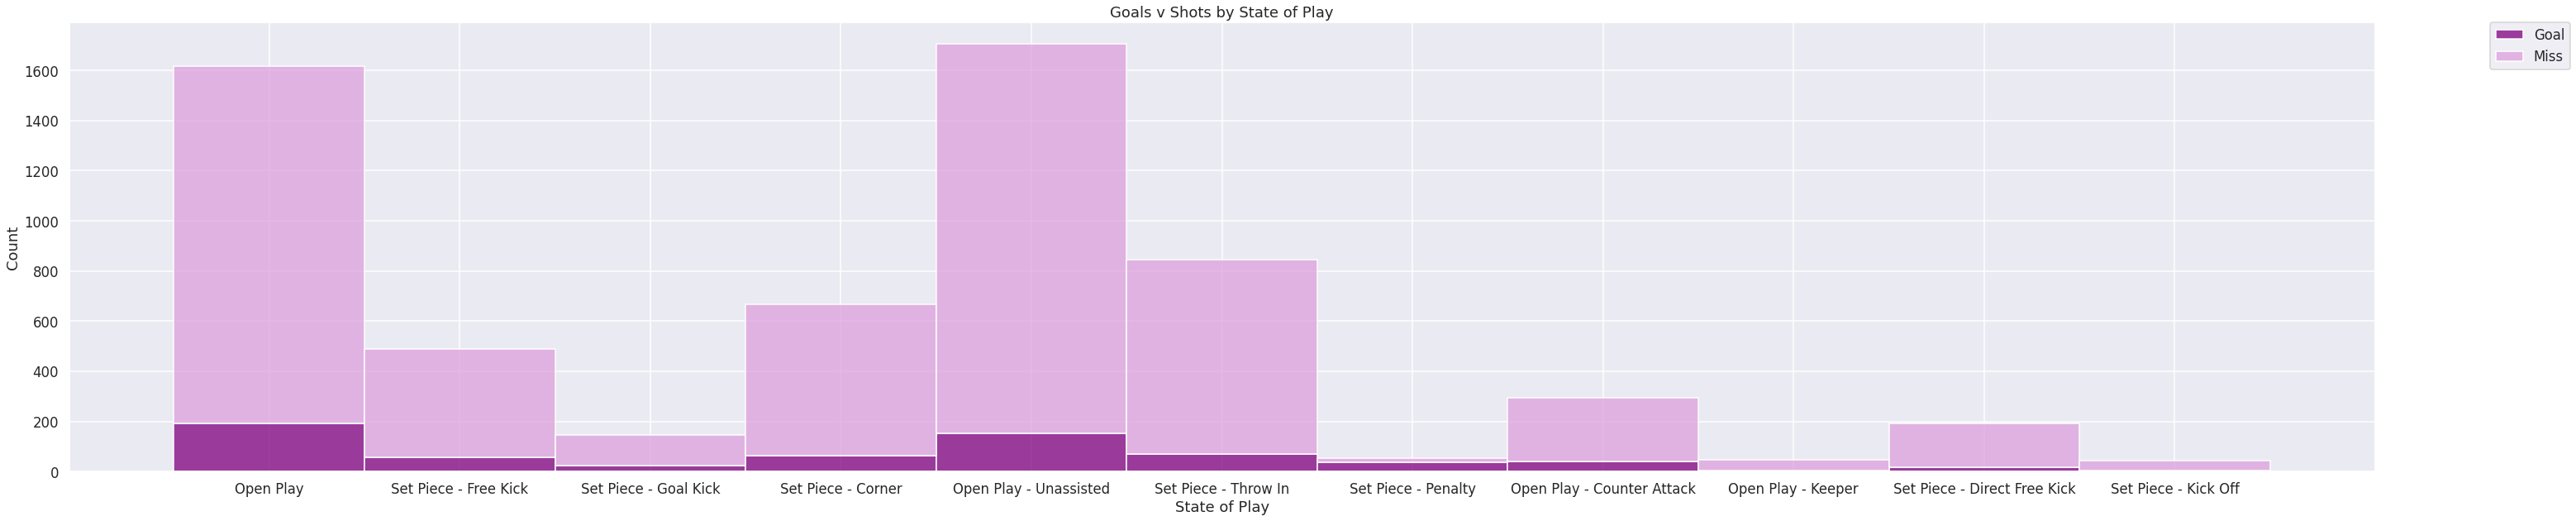

In [ ]:
f, ax = plt.subplots(figsize=(50, 10))
sns.set_palette(sns.color_palette(['plum', 'purple']))
sns.histplot(data = cleaned_data,
             ax = ax,
             multiple = 'stack',
             x = 'state_of_play',
             hue = 'goal',
             element = 'bars')
ax.set_title('Goals v Shots by State of Play')
ax.set_xlabel('State of Play')
ax.legend(labels = ['Goal',
                    'Miss'],
          bbox_to_anchor = (1.05, 1),
          loc = 2,
          borderaxespad = 0);

### Assessment

As expected, the majority of shots are from open play, however, the ratio of goals per capita does not differ from the baseline goal ratio.

The ratio of goals per capita for set pieces as a whole does not differ from the baseline goal ratio.

As expected, an extremely high ratio of penalties result in a goal.

Shots assisted by a goal-kick and shots assisted from a counter-attack, both have higher ratios of goals per capita.  This could indicate a correlation with fast, direct attacking from deeper positions with the likelihood of goals.

Continued in [expected_goals_data_preprocessing_notebook](https://github.com/wswager/milwaukee_rampage_fc/blob/main/data_preprocessing/expected_goals_data_preprocessing_notebook.ipynb)

*6 of 8*